In [1]:
import time
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from meerkat import bme680, tools

In [ ]:
from importlib import reload

In [4]:
def bp(x):
    return tools.bprint(x, n=8)

In [5]:
reload(bme680)
dev = bme680.BME680(bus_n=1)

In [6]:
dev.read_calibration()

1. Set humidty oversample
2. Set temperature oversample
3. Set pressure oversample

In [7]:
dev.set_oversampling(h=1, t=2, p=16)

4. Set gas wait time with gas_wait_0 to 0x59 = 100ms

In [8]:
wait = dev.calc_wait_time(t=25, x=4)
print(hex(wait))

0x59


In [9]:
dev.set_gas_wait(n=0, value=wait)

5. Set heater set-point with res_heat_0, 150 C here

In [10]:
resistance = dev.calc_res_heat(target_temp=150)
resistance

151

In [11]:
dev.set_res_heat(n=0, value=resistance)

6. Set nb_conv to the 0 profile used in steps 4 and 5

In [12]:
dev.nb_conv = 0

7. Set run_gas to 1 to enable gas measurements

In [13]:
dev.gas_on()

8. Set mode to 0b01 to trigger a single forced mode measurement

In [14]:
%%time
dev.forced_mode()
dev.measure()
t = dev.temperature()
p = dev.pressure()
h = dev.humidity()
g = dev.gas()
print("T: ", t)
print("P: ", p)
print("RH:", h)
print("Gas Resistance:", g)
print("Gas Valid:", dev._gas_valid)
print("Heat Stable:", dev._heat_stab)

T:  21.959296875
P:  988.9324631197717
RH: 37.14407996473337
G: 9371
Gas Valid: 1
Heat Stable: 1
CPU times: user 26.7 ms, sys: 1.88 ms, total: 28.6 ms
Wall time: 166 ms


In [15]:
dev.get()

['NA', 1, 22.70109375, 988.9402810123087, 37.35885131851007, 14775, 1, 1]

In [16]:
dev.publish(description='test_1', n=5)

['{"description": "test_1", "sample_n": 1, "T": 23.232734375, "P": 988.9183441202491, "RH": 37.44036984710466, "g_res": 16137, "g_val": 1, "heat_stab": 1, "std_time_ms": "2020-04-05 15:35:01.945124"}',
 '{"description": "test_1", "sample_n": 2, "T": 23.576875, "P": 988.8233891715868, "RH": 37.480666083113746, "g_res": 17245, "g_val": 1, "heat_stab": 1, "std_time_ms": "2020-04-05 15:35:02.098218"}',
 '{"description": "test_1", "sample_n": 3, "T": 24.0048046875, "P": 988.8723947784522, "RH": 37.540918016558436, "g_res": 18122, "g_val": 1, "heat_stab": 1, "std_time_ms": "2020-04-05 15:35:02.251030"}',
 '{"description": "test_1", "sample_n": 4, "T": 24.3262890625, "P": 988.8858694178858, "RH": 37.59056538641925, "g_res": 18787, "g_val": 1, "heat_stab": 1, "std_time_ms": "2020-04-05 15:35:02.404414"}',
 '{"description": "test_1", "sample_n": 5, "T": 24.5591015625, "P": 988.9200691667602, "RH": 37.51210646973395, "g_res": 27569, "g_val": 1, "heat_stab": 1, "std_time_ms": "2020-04-05 15:35:02

In [17]:
# with delay = 1 second, n = number of seconds to record
hrs = 5
seconds = hrs * 60 * 60
dev.write(description='test_2', n=seconds, delay=1)

KeyboardInterrupt: 

In [18]:
from meerkat import parser

In [19]:
dev.csv_writer.path

'2020_04_05_15_35_02_data.csv'

In [24]:
metadata, df = parser.csv_resource(dev.csv_writer.path)

In [25]:
df.head()

,std_time_ms,description,sample_n,T,P,RH,g_res,g_val,heat_stab,datetime64_ns
0,2020-04-05 15:35:02.743802,test_2,0,24.726289,988.971434,37.529125,28463,1,1,2020-04-05 15:35:02.743802
1,2020-04-05 15:35:03.896068,test_2,1,22.653047,988.958277,37.088669,27790,1,1,2020-04-05 15:35:03.896068
2,2020-04-05 15:35:05.049668,test_2,2,22.389766,988.955440,36.634659,27858,1,1,2020-04-05 15:35:05.049668
3,2020-04-05 15:35:06.200333,test_2,3,22.316328,988.946804,36.520687,28152,1,1,2020-04-05 15:35:06.200333
4,2020-04-05 15:35:07.351505,test_2,4,22.301094,988.958156,36.328314,28483,1,1,2020-04-05 15:35:07.351505


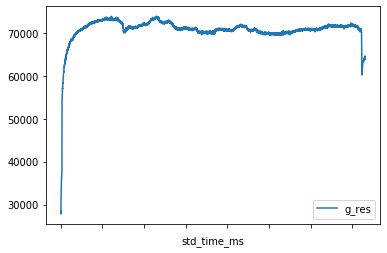

In [26]:
df[["std_time_ms", "g_res"]].plot(x="std_time_ms");

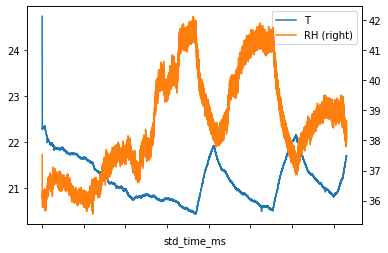

In [27]:
df[["std_time_ms", "T", "RH"]].plot(x="std_time_ms", secondary_y="RH");

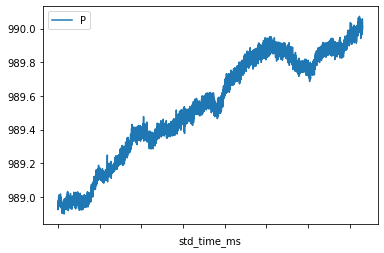

In [28]:
df[["std_time_ms", "P"]].plot(x="std_time_ms");